In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numba

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.optimizers import adam_v2
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import AveragePooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import AvgPool2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import glob

In [ ]:
df="/content/drive/MyDrive/dataset3616"

In [ ]:
os.listdir(df)

['Viral', 'Normal', 'Covid']

In [ ]:
covid_img=[]
normal_img=[]
viral_img=[]
filenames = os.listdir(df)
for filename in glob.glob(df+'/Covid/*'):
    covid_img.append(mpimg.imread(filename))
for filename in glob.glob(df+'/Normal/*'):
    normal_img.append(mpimg.imread(filename))
for filename in glob.glob(df+'/Viral/*'):
    viral_img.append(mpimg.imread(filename))

In [ ]:
print(len(covid_img),len(normal_img),(len(viral_img)))

3616 3616 1345


Pre processing

In [ ]:
Img_hei=256
Img_wid=256
channel=3
input_shape=(Img_wid, Img_hei, channel)
Nb_Classes=3
epoch=10
batch_size=32

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 validation_split=0.3)

In [ ]:
train_generator=train_datagen.flow_from_directory(df,
                                                  target_size=(Img_wid,Img_hei),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  subset='training')

Found 6006 images belonging to 3 classes.


In [ ]:
validation_generator=train_datagen.flow_from_directory(df,
                                                       target_size=(Img_wid,Img_hei),
                                                       batch_size=batch_size,
                                                       class_mode='binary',
                                                       shuffle= False,
                                                       subset='validation')

Found 2571 images belonging to 3 classes.


In [ ]:
history=model.fit(train_generator,
                  steps_per_epoch = train_generator.samples // batch_size,
                  validation_data = validation_generator,
                  validation_steps = validation_generator.samples // batch_size,
                  epochs = epoch)

Epoch 1/10
187/187 [==============================] - 149s 737ms/step - loss: 0.8370 - accuracy: 0.5743 - val_loss: 0.8082 - val_accuracy: 0.7004
Epoch 2/10
187/187 [==============================] - 137s 731ms/step - loss: 0.6874 - accuracy: 0.6692 - val_loss: 0.7738 - val_accuracy: 0.7273
Epoch 3/10
187/187 [==============================] - 137s 733ms/step - loss: 0.6364 - accuracy: 0.6977 - val_loss: 0.7349 - val_accuracy: 0.7285
Epoch 4/10
187/187 [==============================] - 136s 730ms/step - loss: 0.6098 - accuracy: 0.7149 - val_loss: 0.6433 - val_accuracy: 0.7434
Epoch 5/10
187/187 [==============================] - 137s 731ms/step - loss: 0.5708 - accuracy: 0.7308 - val_loss: 0.6540 - val_accuracy: 0.7090
Epoch 6/10
187/187 [==============================] - 137s 732ms/step - loss: 0.5393 - accuracy: 0.7551 - val_loss: 0.7470 - val_accuracy: 0.6488
Epoch 7/10
187/187 [==============================] - 137s 732ms/step - loss: 0.5300 - accuracy: 0.7673 - val_loss: 0.6553 -

In [ ]:
history=model.fit(train_generator,steps_per_epoch=train_generator.samples//batch_size,validation_data=validation_generator,validation_steps=validation_generator.samples//batch_size,
                  epochs=60,
                  initial_epoch=10)

Epoch 11/60
187/187 [==============================] - 138s 739ms/step - loss: 0.4775 - accuracy: 0.7826 - val_loss: 0.7263 - val_accuracy: 0.6625
Epoch 12/60
187/187 [==============================] - 138s 736ms/step - loss: 0.4572 - accuracy: 0.7971 - val_loss: 0.6632 - val_accuracy: 0.6863
Epoch 13/60
187/187 [==============================] - 139s 746ms/step - loss: 0.4579 - accuracy: 0.7966 - val_loss: 0.5710 - val_accuracy: 0.7453
Epoch 14/60
187/187 [==============================] - 137s 733ms/step - loss: 0.4412 - accuracy: 0.8001 - val_loss: 0.7136 - val_accuracy: 0.6672
Epoch 15/60
187/187 [==============================] - 137s 733ms/step - loss: 0.4396 - accuracy: 0.7995 - val_loss: 0.4742 - val_accuracy: 0.7984
Epoch 16/60
187/187 [==============================] - 137s 734ms/step - loss: 0.4411 - accuracy: 0.8070 - val_loss: 0.5473 - val_accuracy: 0.7719
Epoch 17/60
187/187 [==============================] - 138s 737ms/step - loss: 0.4258 - accuracy: 0.8120 - val_loss: 0

In [ ]:
import seaborn as sns

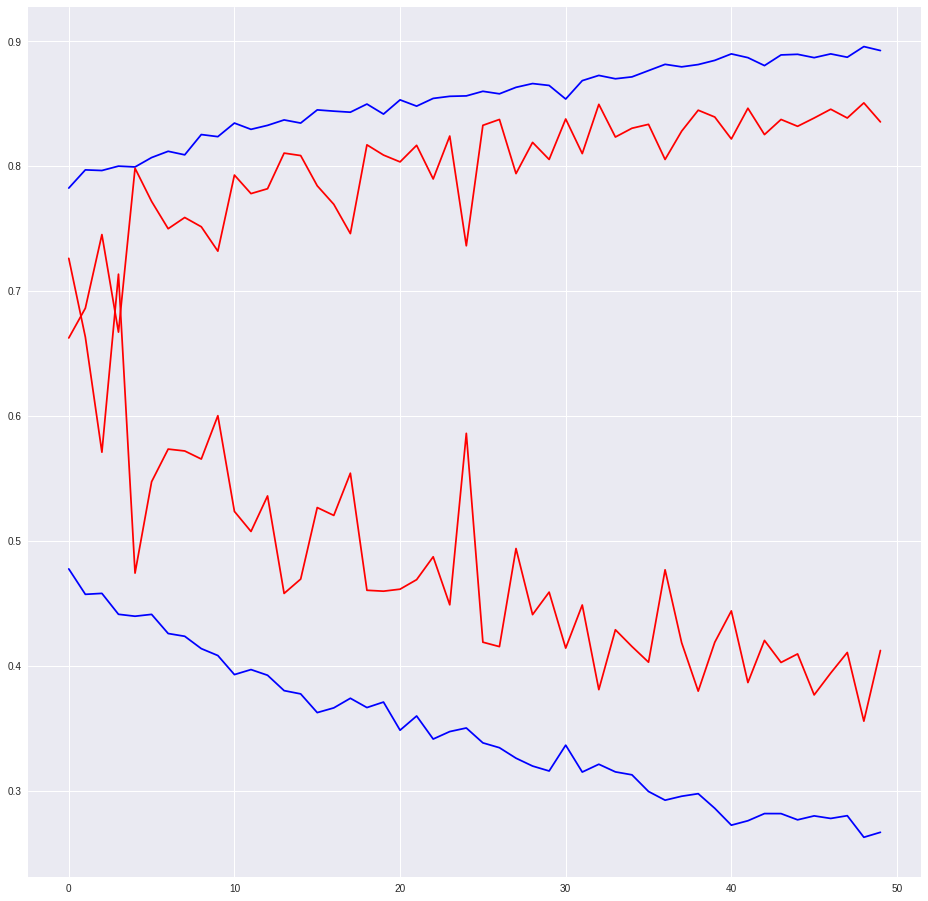

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(16,16))
plt.plot(history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='validation accuracy')
plt.plot(history.history['loss'],color='b',label='training loss')
plt.plot(history.history['val_loss'],color='r',label='validation loss')